# Desafios - Aula 03

Análise desenvolvida durante a semana da Imersão Dados 3 da Alura, analisando dados para Drug Discovery com python por meio do Google Colab

### Organização:
#### Alura

Github: https://github.com/alura-cursos

LinkedIn: https://www.linkedin.com/school/aluracursos/


### Resolução dos Desafios por:

#### Thiago Passos Oliveira

Email: passos.thiago2001@gmail.com

Github: https://github.com/thiagoPassos2001

LinkedIn: https://www.linkedin.com/in/thiago-passos-a55aa51b5/

Importando os dados

Nessa imersão nós vamos mergulhar no universo da biologia e da biotecnologia e explorar uma base de dados da área.

Para a nossa análise, está faltando então os dados. Para conseguirmos esses dados vamos acessar o Github, nesse link:

https://github.com/alura-cursos/imersaodados3/tree/main/dados

Então, agora vamos importar essa base de dados para dentro do nosso notebook. Para juntar essas informações vamos utilizar nossa famosa biblioteca do "Pandas".
Vamos importar essa biblioteca através do seguinte código:

In [113]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

In [114]:
dados.isnull().sum().describe()

count    877.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

* Não há dados nulos

In [115]:
composto = {'droga': 'composto'}
dados.rename(columns=composto, inplace=True)

In [116]:
novas_colunas = [i.replace('-','') for i in dados.columns]
dados.rename(columns=dict(zip(dados.columns, novas_colunas)), inplace = True)

In [117]:
dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


* Manipulação para trocaar o nome "droga" por "composto" (feito na Aula 02)
* Manipulação para excluir "-" dos marcadores

## Desafios
* Desafio 01: Criar tabelas de frequência com pandas.groupby()

* Desafio 02: Normalizar o crosstab pela coluna.

* Desafio 03: Explorar outros agregadores.

* Desafio 04: Explorar o melt.

* Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos. 

* Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

* Desafio 07: Resumo do que você aprendeu com os dados

### Desafio 01: Criar tabelas de frequência com pandas.groupby()

* Podeser utilizar "pd.DataFrame.groupby?" para consultar a documentação da função dentro do notebook ou no link https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html.

In [118]:
#pd.DataFrame.groupby?

In [119]:
dados.groupby(['tratamento','dose','tempo']).count()['id']

tratamento    dose  tempo
com_controle  D1    24        301
                    48        343
                    72        307
              D2    24        305
                    48        305
                    72        305
com_droga     D1    24       3585
                    48       4011
                    72       3600
              D2    24       3581
                    48       3591
                    72       3580
Name: id, dtype: int64

* A função recebe como parâmetro uma lista na ordem de hierarquia que o usuário passa o parâmetro. Utiliza-se o método .count() para contar quanto valores há no grupo e utiliza-se os colchetes para selecionar uma coluna (nesse caso "id") para sintetizar os dados
* Mas outro métodos poderiam ser utilizados como .mean() para uma tabela com as médias ou .std() para os desvios padrão
* Pode-se utilizar uma coluna o gene ou tipo celular desejado para analisar esses parâmetros
* Com a alteração desses parâmtros, é possível obter dados semelhantes ao uso da função .crosstab com algumas diferenças na organização da tabela

Exemplo:

In [120]:
#Com .groupby()
dados.groupby(['tratamento','dose','tempo']).mean()['g0']

tratamento    dose  tempo
com_controle  D1    24      -0.251760
                    48      -0.122773
                    72      -0.295271
              D2    24       0.010754
                    48       0.013174
                    72       0.070250
com_droga     D1    24       0.367996
                    48       0.412469
                    72       0.286250
              D2    24       0.115253
                    48       0.214480
                    72       0.253439
Name: g0, dtype: float64

In [121]:
#Com .crosstab()
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [122]:
pip install squarify

In [123]:
import squarify
import matplotlib.pyplot as plt

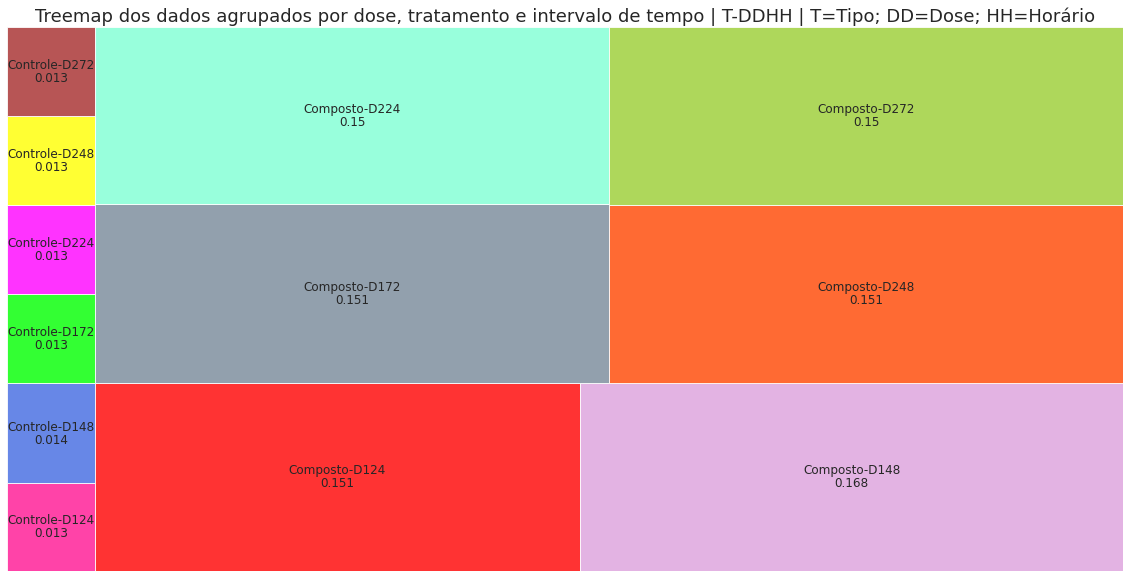

In [124]:
fig, ax = plt.subplots(figsize = (20,10))
squarify.plot(sizes = dados.groupby(['tratamento','dose','tempo']).count()['id'],
              label=['Controle-D124',
                     'Controle-D148',
                     'Controle-D172',
                     'Controle-D224',
                     'Controle-D248',
                     'Controle-D272',
                     'Composto-D124',
                     'Composto-D148',
                     'Composto-D172',
                     'Composto-D224',
                     'Composto-D248',
                     'Composto-D272',
                     ],
              color=['deeppink','royalblue','lime',
                     'magenta', 'yellow', 'brown', 
                     'red', 'plum', 'lightslategrey',
                     'aquamarine', 'orangered', 'yellowgreen'], 
              alpha=.8,
              value=round(dados.groupby(['tratamento','dose','tempo']).count()['id']/sum(dados.groupby(['tratamento','dose','tempo']).count()['id']),3))
plt.title('Treemap dos dados agrupados por dose, tratamento e intervalo de tempo | T-DDHH | T=Tipo; DD=Dose; HH=Horário', size=18)
plt.axis('off')
plt.show()

* Pode-se analisar visualmente a distribuição relativa desses dados pro meio de um Treemap. Percebe-se a maior proporção de dados para testes com o composto do que em relação ao controle (situação já discutida no notebook da Aula 01)

### Desafio 02: Normalizar o crosstab pela coluna.

Utiliza-se o parâmetro "normalize" que tem como padrão False, retornando os valores obsotulos na tabela. Pode receber os seguintes valores para os respectivos comportamentos:

* Se for passado "all" ou True, os valores são normalizados em relação a todos
* Se for passado "index" ou 0, os valores são normalizados em relação às linhas
* Se for passado "colums" ou 1, os valores são normalizados em relação às colunas

Portanto, pode-se utilizar normalize='columns' ou normalize=1


In [125]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize=1)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

Percebe-se por meio dessa configuração de tabela cruzada, que os tipos de teste variando o tempo e a dose em ambos os grupos (com controle e com droga) são tem a mesma proporção, apesar dos valores absolutos bem distintos. essa proporção pode ser interessante para o teste, na medida em que os tamanhos dos grupos podem ser comparáveis entre si e o total. É perceptível essa divisão analisando a visualisação do treemap do desafio anterior.

### Desafio 03: Explorar outros agregadores.

Na documentação da função .crosstab (disponível em https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html ou digitando no notebook "pd.crosstab?"), o parâmetro "aggfunc" é opcional e recebe como valor uma função no formato function ou str.

In [126]:
#pd.crosstab?

Analisando os dados para o gene 123 para o composto "87d714366" por média, desvio padrão e coeficiente de variação. Essa análise por grupo de dose e horário comparado aos grupos de controle e teste para os parâmetros de média, desvio padrão e CV (coeficiente de variação) pode ser útil no entendimento do comportamento daquela substância no gene.

Antes, uma pequena estatística descritiva geral sobre o composto "87d714366" com .describe()

In [127]:
dados.query('composto == "87d714366"').describe()['g123']

count    718.000000
mean       7.657350
std        2.187197
min        1.515000
25%        5.953500
50%        8.040000
75%       10.000000
max       10.000000
Name: g123, dtype: float64

In [128]:
#Média
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados.query('composto == "87d714366" or composto == "cacb2b860"')['g123'], aggfunc=np.mean)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.113636   6.032157
     48         0.184834   8.302137
     72         0.181051   9.290285
D2   24         0.344605   5.314684
     48         0.113569   8.120474
     72         0.092970   8.760637

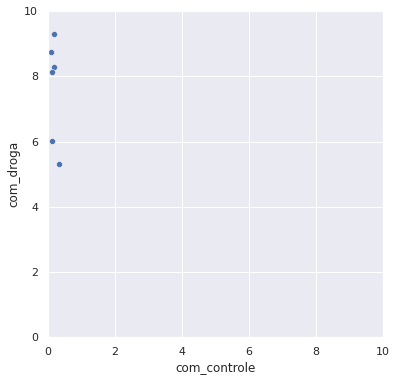

In [129]:
plt.figure(figsize=(6, 6)) # Tamanho da Figura
sns.scatterplot(data=pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados.query('composto == "87d714366" or composto == "cacb2b860"')['g123'], aggfunc=np.mean),
                x='com_controle', 
                y='com_droga')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.show()

* De modo geral o uso dos compostos sugere a elevação da média do parâmetro associado ao g123 com o uso dom composto "87d714366", independente da dose e horário. Isso pode significar a maior ativação do gene 123 com o uso da substância. 

In [130]:
#Desvio Padrão
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados.query('composto == "87d714366" or composto == "cacb2b860"')['g123'], aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.960305   1.924518
     48         0.902203   1.861806
     72         0.895032   1.161676
D2   24         0.760853   1.818355
     48         1.084450   1.598684
     72         0.880859   1.377925

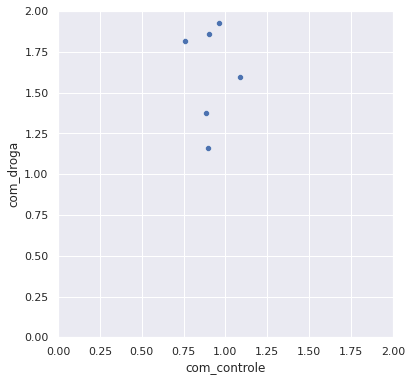

In [131]:
plt.figure(figsize=(6, 6)) # Tamanho da Figura
sns.scatterplot(data=pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados.query('composto == "87d714366" or composto == "cacb2b860"')['g123'], aggfunc='std'),
                x='com_controle', 
                y='com_droga')
plt.xlim([0, 2])
plt.ylim([0, 2])
plt.show()

* De modo análogo à média, o uso dos compostos sugere a elevação do desvio padrão do parâmetro associado ao g123 com o uso dom composto "87d714366", independente da dose e horário. Isso pode significar que a subtância modifica o comportamento da distribuição paraa o qual o gene é ativado. Obs: essa estatística pode não funcionar corretamente com a maior parte dos dados, pois como observado nas analises anteriores (Aula 01), a maior parte das substâncias possui apenas 6 dados, prorvavelmente 1 para cada combinação de grupo. Portanto o desvio padrão nesse caso não faz sentido. O composto "87d714366" possuí 718 amostras como evidenciado na analise descritiva.

In [132]:
#CV
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados.query('composto == "87d714366" or composto == "cacb2b860"')['g123'], aggfunc=lambda x:np.std(x)/np.mean(x))

tratamento  com_controle  com_droga
dose tempo                         
D1   24         8.436691   0.317722
     48         4.874037   0.223399
     72         4.935472   0.124533
D2   24         2.204280   0.340634
     48         9.533137   0.196020
     72         9.459063   0.156588

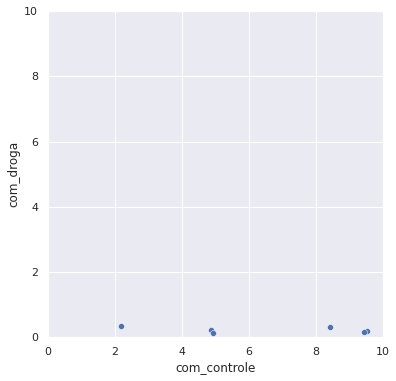

In [133]:
plt.figure(figsize=(6, 6)) # Tamanho da Figura
sns.scatterplot(data=pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados.query('composto == "87d714366" or composto == "cacb2b860"')['g123'], aggfunc=lambda x:np.std(x)/np.mean(x)),
                x='com_controle', 
                y='com_droga')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.show()

* O coeficiente de variação é definido pela razão entre o desvio padrão e a média do grupo. O grupo que utilizou o composto "87d714366" sugere um coeficinte de variação menor que o grupo controle. Pode-se supor a partir disso que o uso da substância pode trazer efeitos mais específicos, notáveis do que o comportamento do gene no grupo contrle, nesse caso a elevação do parâmetro do "g123" por uso do composto e não de modo aleatório. Obs: essa estatística pode não funcionar corretamente com a maior parte dos dados, pois como observado nas analises anteriores (Aula 01), a maior parte das substâncias possui apenas 6 dados, prorvavelmente 1 para cada combinação de grupo. Portanto o desvio padrão nesse caso não faz sentido. O composto "87d714366" possuí 718 amostras como evidenciado na analise descritiva.

* Na última tabela cruzada, utilizei a estrutura **lambda** que permite criar uma função simples que pode ser reutilizada em outras partes do código sem muita complexidade.

Para mais sobre funções lambda: https://realpython.com/python-lambda/

Mais sobre o que é o coeficiente de variação (CV): https://en.wikipedia.org/wiki/Coefficient_of_variation

### Desafio 04: Explorar o melt.

A função "pd.melt?" (disponível em https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html ou digitando no notebook "pd.crosstab?") possibilita à ou mais colunas tornarem-se variáveis ​​identificadoras (id_vars) e  todas as outras colunas, consideradas variáveis ​​medidas (value_vars).

As duas últimas colunas aborda a variável com aquela configuração específica com o nome e o valor da variável.

Esse recurso facilita a modelagem da tabela de modo mais livre às necessidades de análise.

In [134]:
#pd.melt?

In [135]:
pd.melt(dados, id_vars=['id', 'tempo', 'dose', 'composto', 'tratamento'], value_vars=['g0', 'g10', 'g100'])

,id,tempo,dose,composto,tratamento,variable,value
0,id_000644bb2,24,D1,b68db1d53,com_droga,g0,1.0620
1,id_000779bfc,72,D1,df89a8e5a,com_droga,g0,0.0743
2,id_000a6266a,48,D1,18bb41b2c,com_droga,g0,0.6280
3,id_0015fd391,48,D1,8c7f86626,com_droga,g0,-0.5138
4,id_001626bd3,72,D2,7cbed3131,com_droga,g0,-0.3254
...,...,...,...,...,...,...,...
71437,id_fffb1ceed,24,D2,df1d0a5a1,com_droga,g100,-0.6344
71438,id_fffb70c0c,24,D2,ecf3b6b74,com_droga,g100,-0.5803
71439,id_fffc1c3f4,48,D2,cacb2b860,com_controle,g100,-0.2501
71440,id_fffcb9e7c,24,D1,8b87a7a83,com_droga,g100,1.5780


### Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.

Questões norteadoras

Por que procurar correlações?

Correlações são importantes pois evidenciam/alertam possíveis mudanças nos efeitos sobre os genes ou os tipos celulares, quando comparados ao grupo controle. Isso propõe a pergunta: o que provocou essa alteração entre o grupo controle e o uso dos compostos. Pode ser o efeito do composto, um erro experimental, um fator externo ou algum outro fator indeterminado.

Logo, é uma importante para expôr características e compostos mais relevantes para análise ou efeitos mascarados.

* Existe correlação entre o efeito sofrido pelos genes (g)
* Existe correlação entre o efeito sofrido pelos tipos celulares (c)
* Existe correlação entre o efeito sofrido pelos genes (g) e pelos tipos celulares (c)

In [136]:
dados.loc[:,'g0':'g771'].corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0.000141,-0.172896,-0.324769,-0.291644,0.302912,0.222951,0.144028,-0.020950,0.129354,-

Cada chaveamento entre linha e coluna representa a correlação entre os respectivos elementos. O valor calculado pela função .corr é o coeficiente de correlação de Pearson (mais sobre: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), que varia de -1 a 1. 

Para correlações fortes (não necessariamente causais), esse valor aproxima-se de 1 enquanto para valores próx. de 0, significa que há pouca ou nenhama correlação matemática entre os valores.

Devido à dificuldade em compreender essa tabela (matriz de correlação), pode-se utilizar recursos de visualização que evidencie o valor a força da correlação.

Tomando apenas os parâmetros de "g0" até "g25", temos:

In [137]:
dados.loc[:,'g0':'g25'].corr().loc['g0':'g25','g0':'g25']

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682
g5,-0.165478,-0.151590,0.018516,0.042231,-0.057449,1.000000,0.083620,0.102345,0.073885,0.126561,0.038743,-0.171709,-0.000393,-0.112423,0.073760,0.037763,0.221227,0.033641,0.041073,0.134431,0.136226,0.042455,0.095901,-0.000709,0.120697,0.082212
g6,0.238348,-0.122541,0.015190,-0.043177,0.206405,0.083620,1.000000,0.030544,-0.212292,-0.134739,-0.264575,-0.064363,-0.041731,0.110102,-0.126069,-0.107593,-0.109543,-0.182960,-0.058387,0.070343,0.049195,0.244205,-0.076039,-0.063008,0.034160,-0.002408
g7,-0.374451,0.144537,-0.144205,-0.175692,-0.032748,0.102345,0.030544,1.000000,0.278085,0.288780,0.382325,-0.184966,0.166101,-0.380687,0.266334,0.141999,0.372104,0.185269,-0.061020,0.121534,0.231938,0.321506,-0.043685,0.143473,0.458273,0.123891
g8,-0.604212,-0.009973,-0.128029,-0.086167,-0.474828,0.073885,-0.212292,0.278085,1.000000,0.330284,0.556854,-0.145569,0.278549,-0.386297,0.417574,-0.078128,0.424483,0.639804,-0.085082,-0.006910,0.419846,0.037205,-0.028802,0.175015,0.246916,0.295657
g9,-0.428779,-0.047558,-0.081332,-0.014052,-0.274167,0.126561,-0.134739,0.288780,0.330284,1.000000,0.423656,-0.182298,0.181920,-0.309551,0.306363,0.099181,0.390175,0.327539,-0.002785,-0.003900,0.241005,0.000340,0.140954,0.161157,0.235827,0.123404


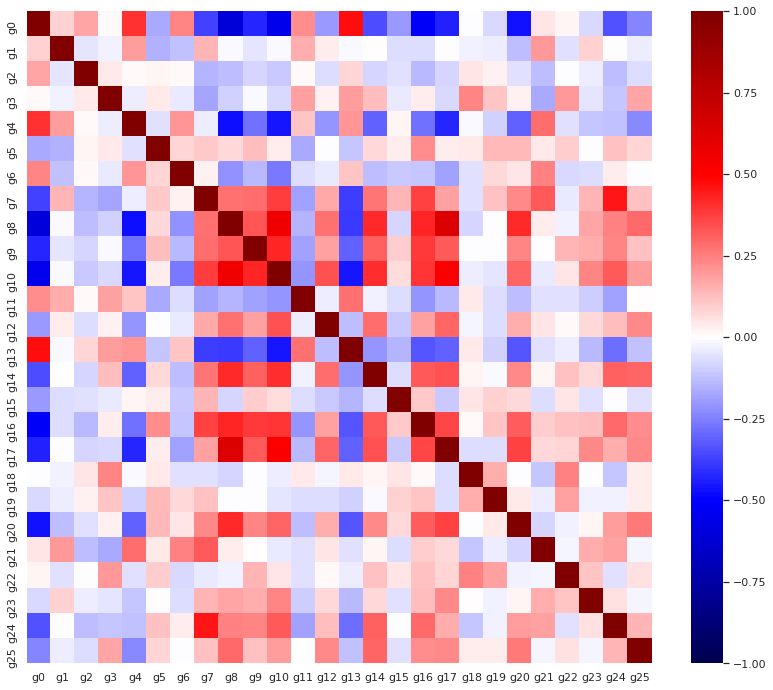

In [138]:
plt.figure(figsize=(14, 12)) # Tamanho da Figura
sns.heatmap(dados.loc[:,'g0':'g25'].corr().loc['g0':'g25','g0':'g25'],
            vmin=-1,
            vmax=1,
            cmap='seismic')

* Observando a escala de cores do lado direito, percebe-se que a intensidade e a tonalidade (azul ou vermelho) facilita a visualização das correlações. 

Analisando uma correlação específica entre "g-8" e "g-0" (no heatmap em azul forte (correlação negativa)):

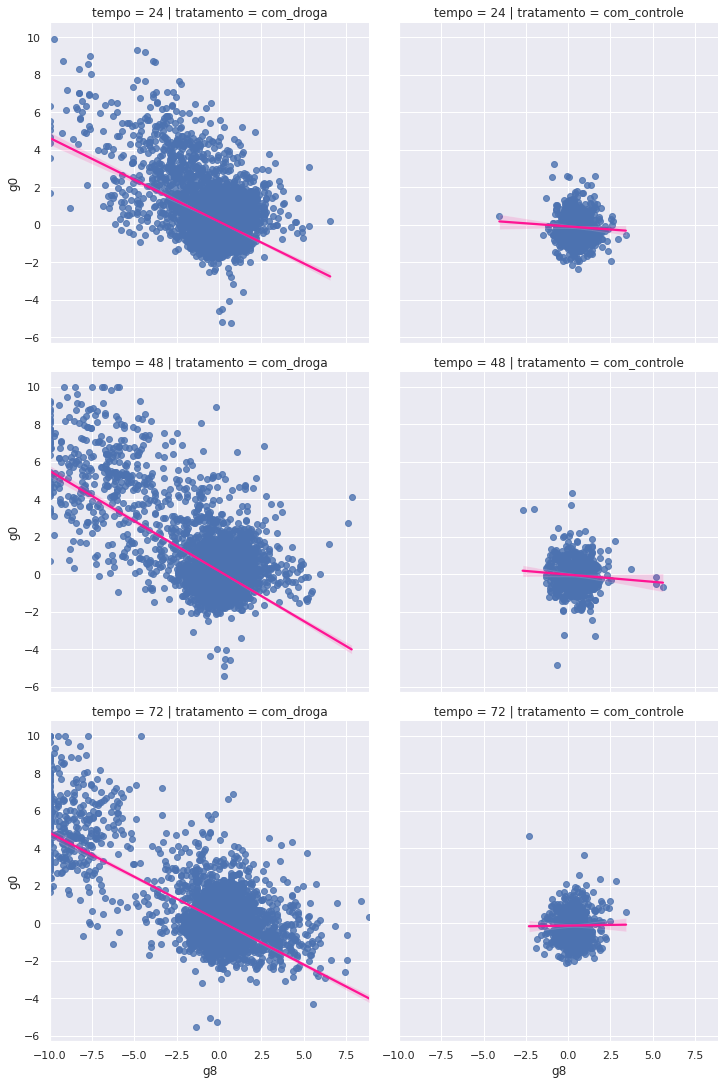

In [139]:
ax = sns.lmplot(data=dados, x='g8', y='g0', line_kws={'color': 'deeppink'}, col='tratamento', row='tempo')

* Percebe-se que a correlação negativa existe apenas para os dados que para os dados de teste com o componente. Para os dados de contrle, a relação entre os genes parece ser próxima a 0, evidenciado pela reta horizontal.
* A cor rosa fraca ao redor da tabela representa os limites do intervalo de confiança para a reta de regressão. Quão mais dispersos são os dados em determinada região, maior são esses limites, pois não é possível garantir que a média dos dos manterá-se próximo a reta.

Para os dados dos tipos celulares, executamos um processo análogo

In [140]:
dados.loc[:,'c0':'c99'].corr()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
c0,1.000000,0.827336,0.848472,0.798830,0.840695,0.844469,0.811946,0.793171,0.842977,0.759971,0.850533,0.832837,0.808033,0.836838,0.823716,0.827496,0.788947,0.831436,0.797051,0.796719,0.818420,0.823586,0.717807,0.805687,0.836447,0.837448,0.815484,0.840909,0.824231,0.807981,0.818558,0.855363,0.831066,0.820803,0.828947,0.829693,0.839386,0.774960,0.806885,0.849807,...,0.839605,0.846656,0.851796,0.797634,0.820904,0.806811,0.845954,0.825661,0.833020,0.812924,0.814969,0.837019,0.845174,0.847267,0.723442,0.845666,0.761470,0.791360,0.840550,0.812687,0.839668,0.825544,0.844675,0.852891,0.836344,0.859314,0.817635,0.787650,0.838987,0.827124,0.835217,0.832529,0.799196,0.817657,0.846457,0.815499,0.845579,0.834513,0.800682,0.777426
c1,0.827336,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,0.866297,0.884532,0.861089,0.880177,0.820911,0.857797,0.771984,0.843076,0.861134,0.820399,0.837626,0.852621,0.756086,0.812062,0.874647,0.829208,0.887230,0.853246,0.861559,0.789314,0.816042,0.889619,0.837788,0.866130,0.865169,0.840517,0.877007,0.779697,0.890506,0.835689,...,0.875778,0.823214,0.889565,0.868589,0.840502,0.856425,0.869802,0.886129,0.834581,0.814084,0.869416,0.826417,0.861290,0.851737,0.725885,0.884601,0.830345,0.846593,0.837897,0.844521,0.842983,0.885487,0.868565,0.870559,0.875755,0.874084,0.818480,0.793513,0.838070,0.811761,0.875405,0.839236,0.876519,0.868431,0.886750,0.803637,0.871383,0.866084,0.815952,0.781510
c2,0.848472,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,0.892033,0.904968,0.879638,0.910497,0.841421,0.884464,0.800587,0.879281,0.881011,0.824149,0.853648,0.878793,0.761439,0.832908,0.887800,0.859023,0.899897,0.879307,0.876141,0.824171,0.851934,0.906052,0.850681,0.890263,0.880173,0.852595,0.887820,0.799599,0.905449,0.866557,...,0.897347,0.848344,0.898224,0.887169,0.853978,0.874032,0.894848,0.892008,0.857836,0.838323,0.877652,0.849427,0.891245,0.890797,0.738358,0.892939,0.832679,0.858314,0.866675,0.858469,0.871477,0.899199,0.892636,0.887700,0.896144,0.891606,0.844756,0.800533,0.853413,0.835940,0.902964,0.872660,0.883866,0.885419,0.906584,0.837420,0.898270,0.874869,0.839640,0.802032
c3,0.798830,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,0.818465,0.828218,0.803839,0.822104,0.788432,0.818493,0.758345,0.804018,0.806834,0.781198,0.791121,0.816744,0.742109,0.792355,0.828853,0.829277,0.807726,0.816247,0.818892,0.790481,0.796522,0.830602,0.796222,0.804081,0.811296,0.805880,0.820989,0.747433,0.813351,0.827805,...,0.810208,0.797311,0.835446,0.817884,0.810944,0.788175,0.835219,0.813661,0.805820,0.794756,0.782965,0.806491,0.840010,0.824398,0.702892,0.823897,0.765937,0.802952,0.800673,0.803913,0.813930,0.835707,0.819130,0.813694,0.834414,0.819223,0.808987,0.772220,0.811936,0.796889,0.825342,0.813555,0.812200,0.803603,0.830301,0.799760,0.822001,0.814889,0.779998,0.768872
c4,0.840695,0.879258,0.909991,0.831523,1.000000,0.883526,0.893285,0.808096,0.888384,0.822614,0.890057,0.904082,0.870384,0.911130,0.839991,0.879147,0.779366,0.879616,0.893702,0.807685,0.833680,0.885335,0.768383,0.854108,0.872477,0.872339,0.900002,0.869316,0.875701,0.808720,0.851560,0.901149,0.836846,0.891190,0.865017,0.851393,0.887747,0.792168,0.900725,0.870204,...,0.885975,0.837735,0.888442,0.900435,0.839403,0.862301,0.903555,0.885107,0.860831,0.835481,0.859855,0.850158,0.881167,0.893576,0.740225,0.882419,0.847703,0.847125,0.856590,0.862995,0.862491,0.903756,0.902625,0.879256,0.893951,0.882537,0.839999,0.779533,0.843129,0.816772,0.895967,0.890255,0.882185,0.868684,0.900309,0.839111,0.901603,0.873534,0.834823,0.795218
...,...,...,...,...,...,...,...,...,...,...,...,..

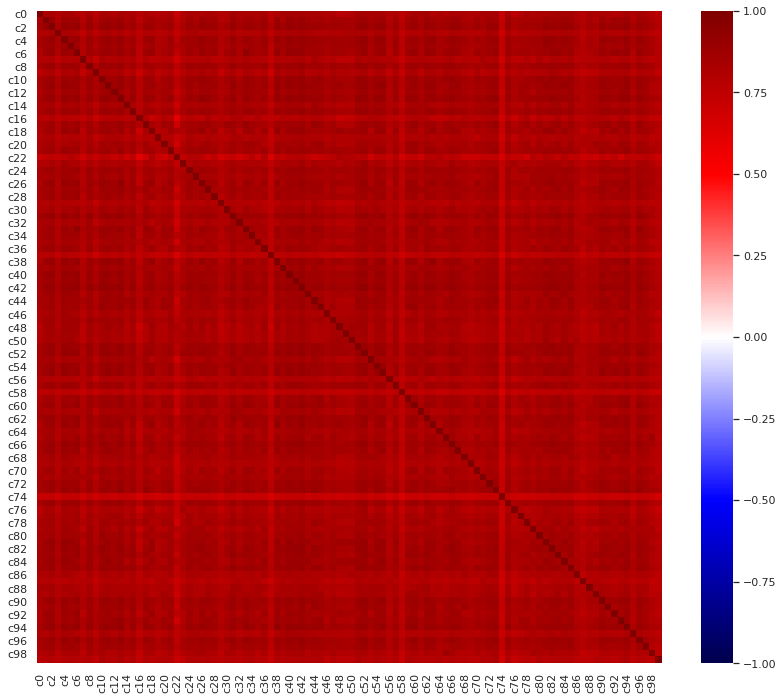

In [141]:
plt.figure(figsize=(14, 12)) # Tamanho da Figura
sns.heatmap(dados.loc[:,'c0':'c99'].corr().loc['c0':'c99','c0':'c99'],
            vmin=-1,
            vmax=1,
            cmap='seismic')

* Para os tipos celulares (c) apresentam grande correlação no geral, quase independente do tipo escolhido.
* Isso pode possivelmente devio às estruturas celulares terem um comportamento comum (nesse caso sobrevivência) para a reação com as demais células.

Tomando os tipos "c-34" e "c-43" para analisar o exemplo

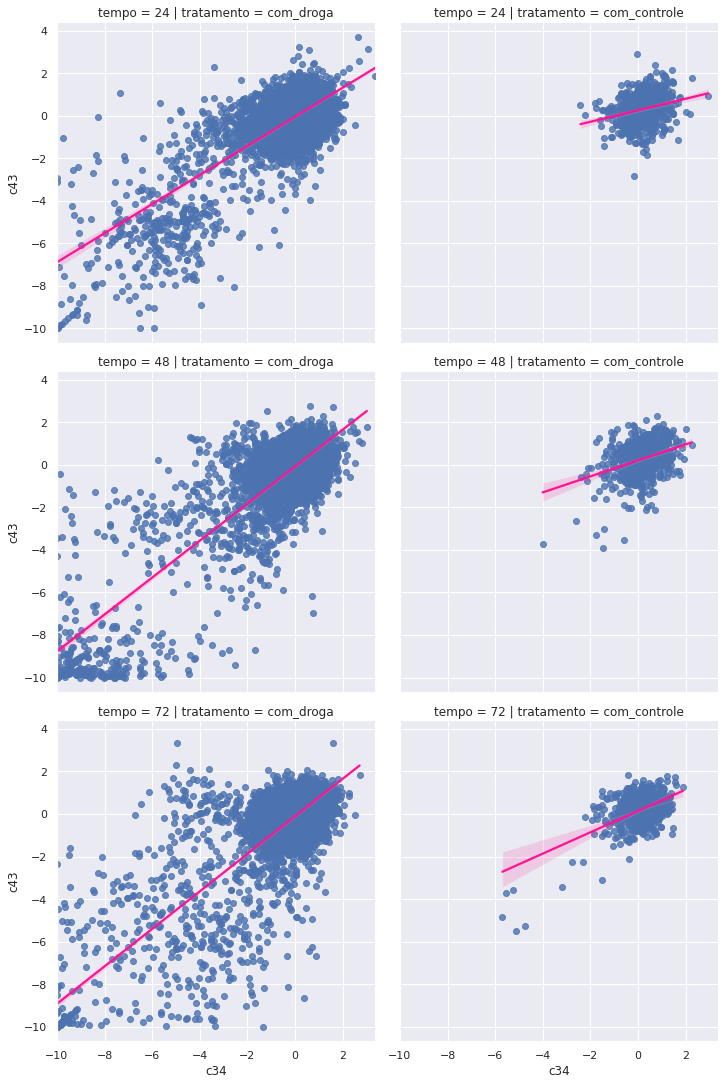

In [142]:
ax = sns.lmplot(data=dados, x='c34', y='c43', line_kws={'color': 'deeppink'}, col='tratamento', row='tempo')

* Percebe-se que provavelmente em ambos os tipos de tratamento, ocorreram mudanças pequenas na inclinação da reta, de modo que no geral, a maior parte dos componentes pode influenciar o comportamento dos tipos celulares.

###  Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

O código do heatmap utilizado na Aula 03 tem a seguinte estrutura:

* Dados

In [143]:
corr = dados.loc[:,'g0':'g50'].corr()

* Gera uma máscara para o triângulo superior

mask = np.triu(np.ones_like(corr, dtype=bool))

* Set up the matplotlib figure

f, ax = plt.subplots(figsize=(11, 9))

* Generate a custom diverging colormap

cmap = sns.diverging_palette(230, 20, as_cmap=True)

* Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})




* Gera uma máscara para o triângulo superior

mask = np.triu(np.ones_like(corr, dtype=bool))

* np.ones_like(corr, dtype=bool) cria uma matriz igua a matriz "corr" no formato booleano
* np.triu retorna uma matriz triangular superior

In [144]:
np.triu(np.ones_like(corr, dtype=bool))

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

* Coloca a figra com um gráfico matplotlib

f, ax = plt.subplots(figsize=(11, 9))

In [148]:
#f, ax = plt.subplots(figsize=(11, 9))

* Modifica a paleta de cores do gráfico
cmap = sns.diverging_palette(230, 20, as_cmap=True)

In [146]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

* Desenha o heatmap passando:
  * máscara para visualizar apenas uma matriz triangular;
  * padrão de cores com cmap
  * center = 0 que especifica onde centralizar o mapa de cores
  * square = True que define o aspecto dos eixos como “igual” para que cada célula
  * linewidths = .5 que define a largura da linha que separa cada célula do gráfico
  * cbar_kws={"shrink": .5} que define a proporção da barra de cores em relação ao gráfico

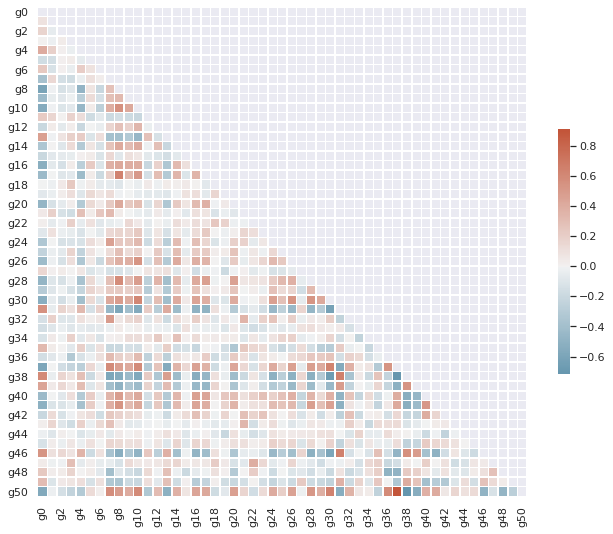

In [147]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Mais sobre heatmap pode ser acessado em https://seaborn.pydata.org/generated/seaborn.heatmap.html ou por meio de "sns.heatmap?" no notebook.

In [149]:
#sns.heatmap?

### Desafio 07: Resumo do que você aprendeu com os dados

* Percebe-se a maior proporção de dados para testes com o composto do que em relação ao controle (situação já discutida no notebook da Aula 01)
* Análise do "g123" com o composto "87d714366"
  * De modo geral, o uso do composto "87d714366" sugere a elevação da média do parâmetro associado ao g123 em comparação com o grupo controle, independente da dose e horário, requerendo um teste estatístico para verificar se essa diferença é significativa ou não. Isso pode significar a maior ativação do gene 123 com o uso da substância.
  * De modo análogo à média, o uso dos compostos sugere a elevação do desvio padrão do parâmetro associado ao g123 com o uso dom composto "87d714366", independente da dose e horário. Isso pode significar que a subtância modifica o comportamento da distribuição para o qual o gene é ativado, requerendo um teste estatístico para verificar se essa diferença é significativa ou não. Obs: essa estatística pode não funcionar corretamente com a maior parte dos dados, pois como observado nas analises anteriores (Aula 01), a maior parte das substâncias possui apenas 6 dados, prorvavelmente 1 para cada combinação de grupo. Portanto o desvio padrão nesse caso não faz sentido. O composto "87d714366" possuí 718 amostras como evidenciado na analise descritiva.
  * O coeficiente de variação é definido pela razão entre o desvio padrão e a média do grupo. O grupo que utilizou o composto "87d714366" sugere um coeficinte de variação menor que o grupo controle. Pode-se supor a partir disso que o uso da substância pode trazer efeitos mais específicos, notáveis do que o comportamento do gene no grupo contrle, nesse caso a elevação do parâmetro do "g123" por uso do composto e não de modo aleatório.
* Comparação entre "g-8" e "g-0"
  * Para os tipos de gene (g), comparando "g-8" e "g-0", percebe-se que a correlação negativa existe apenas para os dados que para os dados de teste com o componente. Para os dados de contrle, a relação entre os genes parece ser próxima a 0, evidenciado pela reta horizontal.
  A cor rosa fraca ao redor da tabela representa os limites do intervalo de confiança para a reta de regressão. Quão mais dispersos são os dados em determinada região, maior são esses limites, pois não é possível garantir que a média dos dos manterá-se próximo a reta.
  * Percebe-se que provavelmente em ambos os tipos de tratamento, ocorreram mudanças pequenas na inclinação da reta, de modo que no geral, a maior parte dos componentes pode influenciar o comportamento dos tipos celulares.
* Comparação entre os tipos celulares (c)
  * Para os tipos celulares (c) apresentam grande correlação no geral, quase independente do tipo escolhido. Isso pode possivelmente devio às estruturas celulares terem um comportamento comum (nesse caso sobrevivência) para a reação com as demais células.